## imports

In [6]:
#from google.colab import files
#uploaded = files.upload()
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay,accuracy_score


Saving processedtest.csv to processedtest (1).csv
Saving processedtrain.csv to processedtrain (1).csv


## load  

In [7]:
df_train=pd.read_csv('datasets/clean/processedtrain.csv')
df_test=pd.read_csv('datasets/clean/processedtest.csv')
data=df_train.copy()
df_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,0.085106,1.82,0.769403,1,1,3.00,3.0,1,0,2.71,0,2.00,0.814,1,0.753684,Obesity_Type_III
1,0,0.382979,1.84,0.442239,1,1,2.33,2.0,1,0,2.56,0,1.33,0.481,1,0.212105,Overweight_Level_II
2,0,0.212766,1.76,0.584552,1,1,1.54,3.0,1,0,2.00,0,1.63,0.631,1,0.753684,Obesity_Type_II
3,1,0.255319,1.62,0.534925,1,1,3.00,3.0,1,0,2.69,0,0.00,0.425,1,0.753684,Obesity_Type_III
4,0,0.382979,1.78,0.613433,1,1,2.76,3.0,1,0,2.16,0,0.43,0.716,1,0.212105,Obesity_Type_II


## prep

In [11]:
features = ['Weight','Height','Age','FCVC','NCP']
x_train = df_train[features]
y_train = df_train.NObeyesdad


x_test = df_test[features]
y_test = df_test.NObeyesdad

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



## build model

In [14]:
model = SVC(decision_function_shape='ovo', C = 10, gamma = 'scale', kernel= 'rbf',random_state = 0)
model.fit(x_train_scaled,y_train)

y_pred=model.predict(x_test_scaled)
pred = model.predict(x_train_scaled)
acc = accuracy_score(y_train,pred)
print (f"Train Accuracy : {acc:.2f}" )


Train Accuracy : 0.98


## accuracy test

Test Accuracy : 0.90

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        24
      Normal_Weight       1.00      0.88      0.93        32
     Obesity_Type_I       0.84      0.90      0.87        29
    Obesity_Type_II       0.93      0.97      0.95        38
   Obesity_Type_III       0.97      1.00      0.98        28
 Overweight_Level_I       0.82      0.69      0.75        26
Overweight_Level_II       0.78      0.85      0.82        34

           accuracy                           0.90       211
          macro avg       0.90      0.90      0.90       211
       weighted avg       0.90      0.90      0.90       211



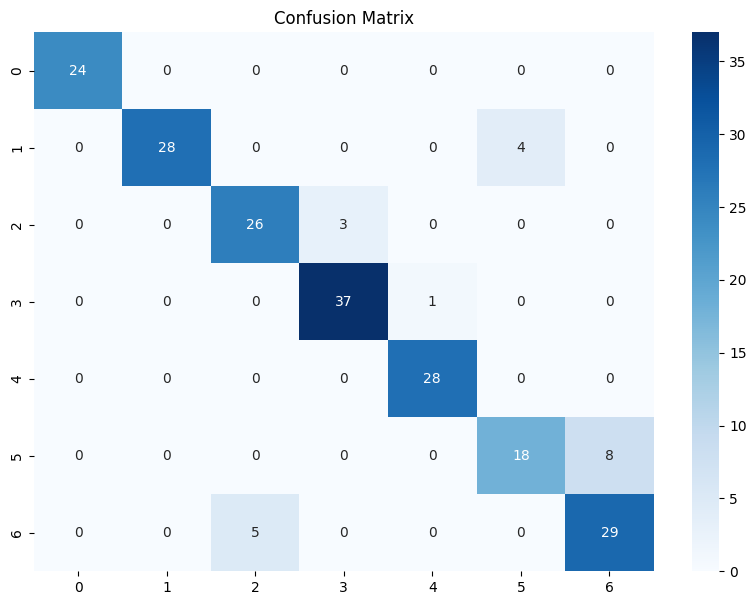

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print (f"Test Accuracy : {accuracy:.2f}" )
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()